**MACHINE LEARNING PROJECT**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**1. Loading Data**

In [2]:
bnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
print(f'Number of rows: {bnb_df.shape[0]}')
print(f'Number of columns: {bnb_df.shape[1]}')

Number of rows: 48895
Number of columns: 16


**1.1 Cleaning Data**

In [7]:
drop_list = ['id', 'host_id', 'host_name', 'last_review', 'name', 'neighbourhood']

In [8]:
bnb_df.drop(drop_list, axis=1, inplace=True)

In [9]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [10]:
# replace the missing values in 'reviews_per_month' with the mean
bnb_df['reviews_per_month'].fillna(bnb_df['reviews_per_month'].mean(), inplace=True)

In [11]:

bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

**1.2 Statistics of the Data**

In [12]:
bnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.373221,1.497775,0.01000,0.28000,1.22000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [13]:
bnb_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

**2. Exploratory Data Analysis**

I analyzed the distribution of Airbnb listings across New York City’s neighbourhood groups using a bar chart and a pie chart to visualize both the absolute counts and percentage shares.

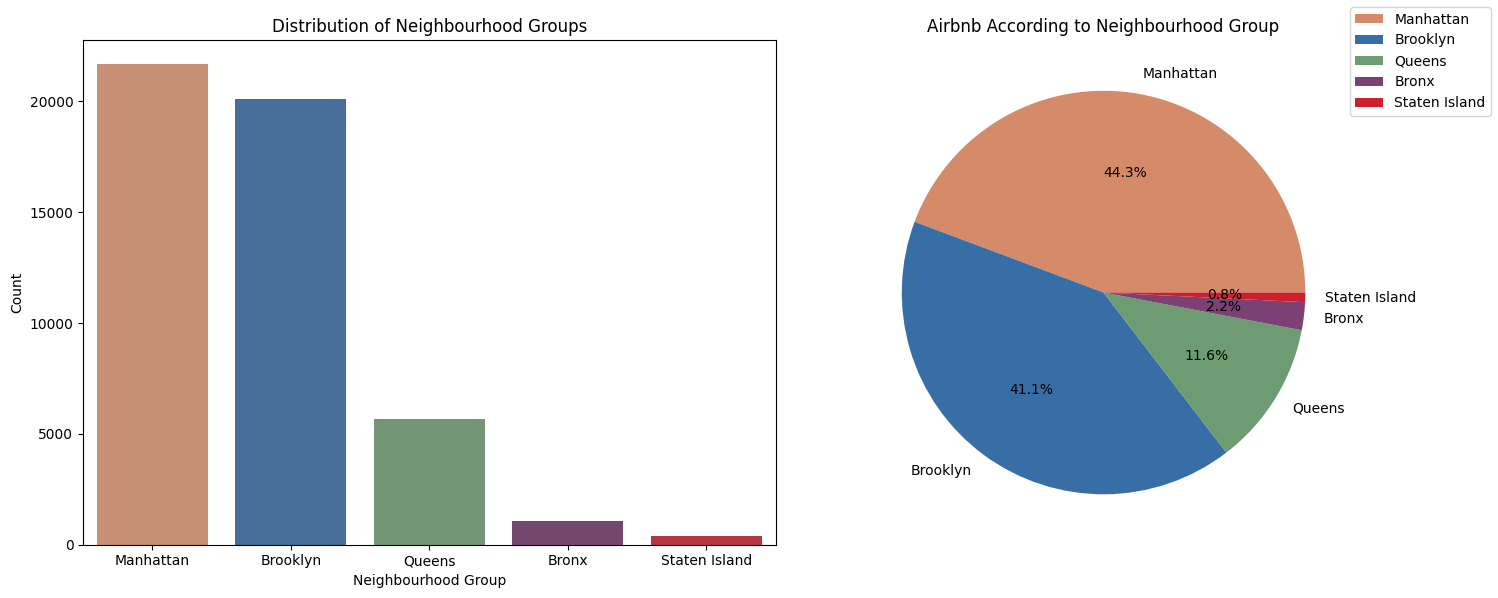

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.neighbourhood_group.value_counts().index
colors = ['#D58B69','#386EA6','#6E9C72','#7B4173','#CD202C']
explode = [0,0,0,0,0]
sizes = bnb_df.neighbourhood_group.value_counts().values

sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

The analysis shows that Manhattan has the highest number of listings, followed by Brooklyn, together accounting for the largest portion of the Airbnb market in the city.

I examined the distribution of Airbnb listings by room type using both a bar chart and a pie chart to show the total counts and percentage of each category.

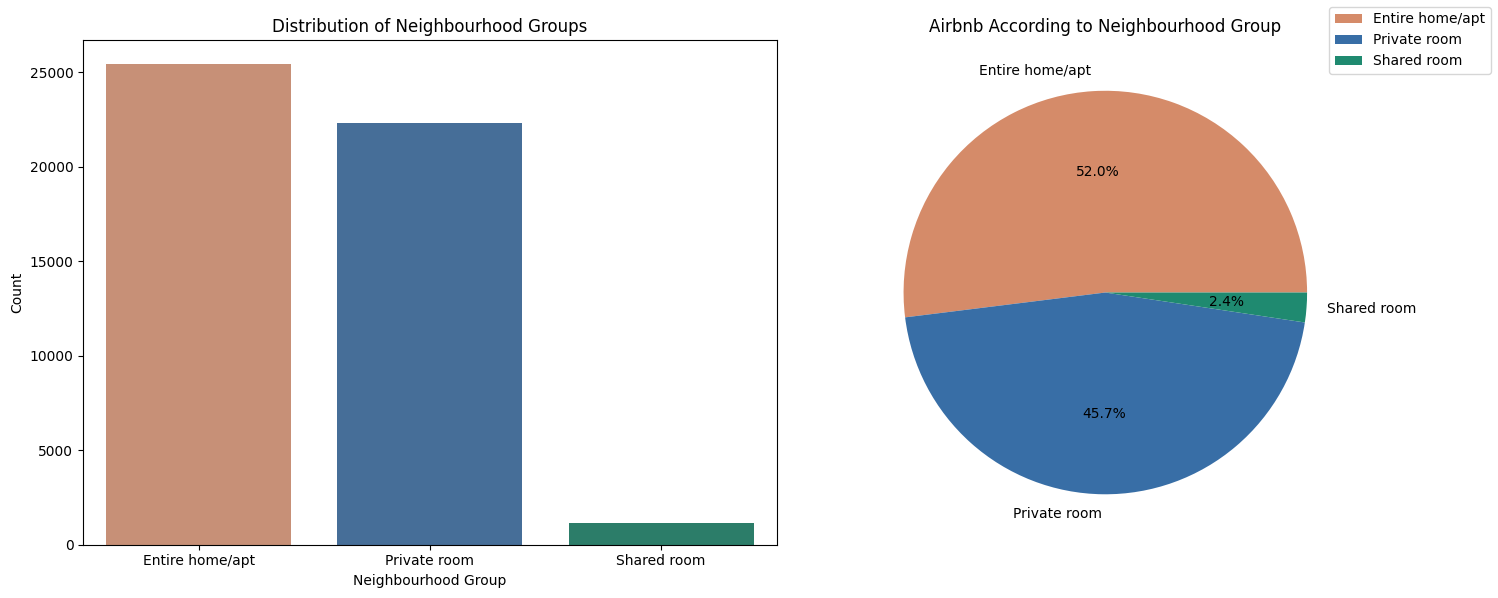

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.room_type.value_counts().index
colors = ['#D58B69','#386EA6','#1F8A70']
explode = [0,0,0]
sizes = bnb_df.room_type.value_counts().values

sns.countplot(x='room_type', hue='room_type', order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

The majority of listings are for entire homes/apartments, followed by private rooms, while shared rooms represent only a small fraction of the market.

I used a violin plot to explore the distribution of Airbnb prices across different neighbourhood groups, focusing on values under $800 to reduce the effect of extreme outliers.

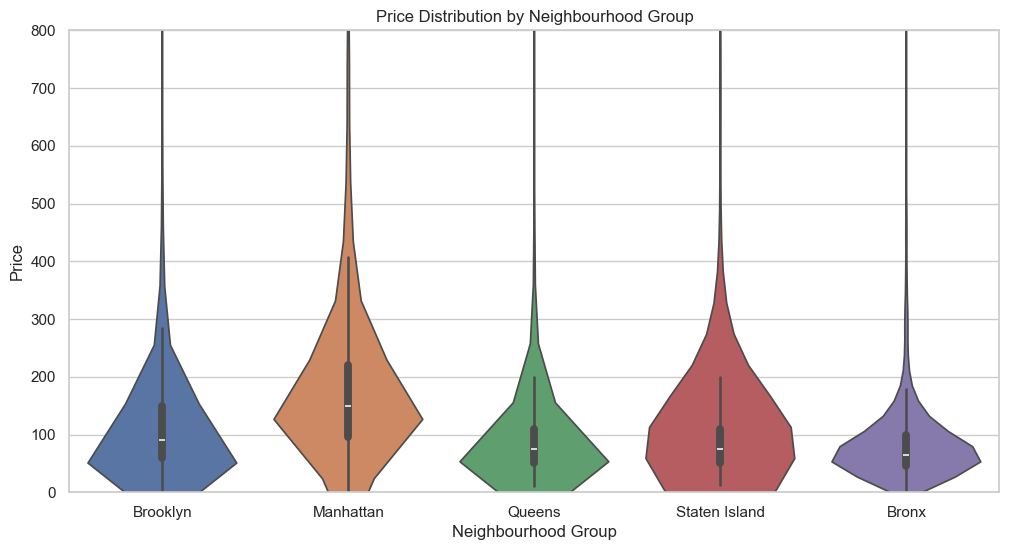

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=bnb_df, hue='neighbourhood_group')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.ylim((0,800))
plt.show()

Manhattan shows the highest price range and density, followed by Brooklyn, while Queens, Bronx, and Staten Island tend to have significantly lower prices overall.

A violin plot was used to visualize the price distribution for each room type, focusing on listings under $800 to exclude extreme outliers and highlight general trends

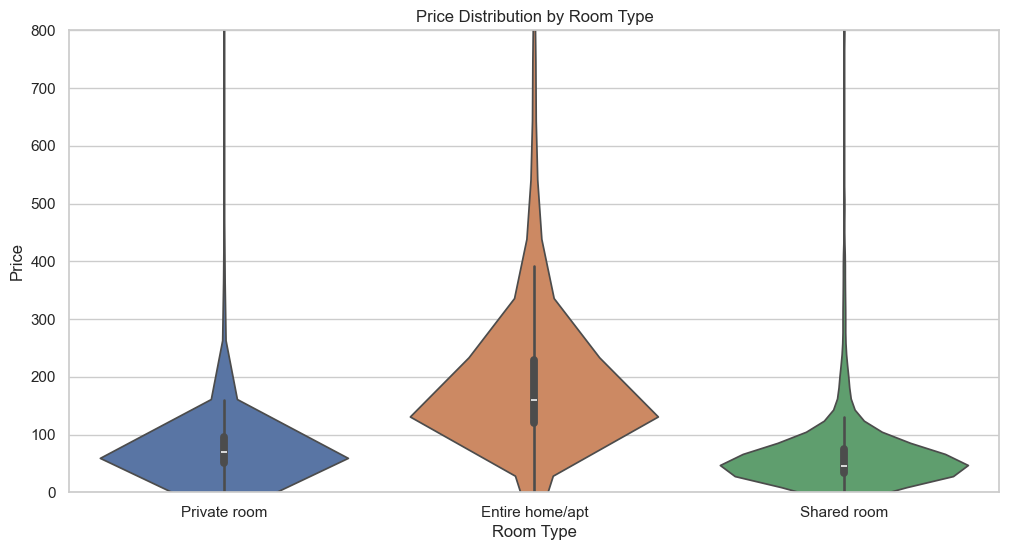

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='price', data=bnb_df, hue='room_type')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type') 
plt.ylabel('Price')
plt.ylim((0,800))
plt.show()

Entire home/apartment listings clearly have the highest price range, while shared rooms are the cheapest. Private rooms fall in between, offering a more affordable option.

I computed the correlation matrix to examine the linear relationships between numerical variables in the dataset.

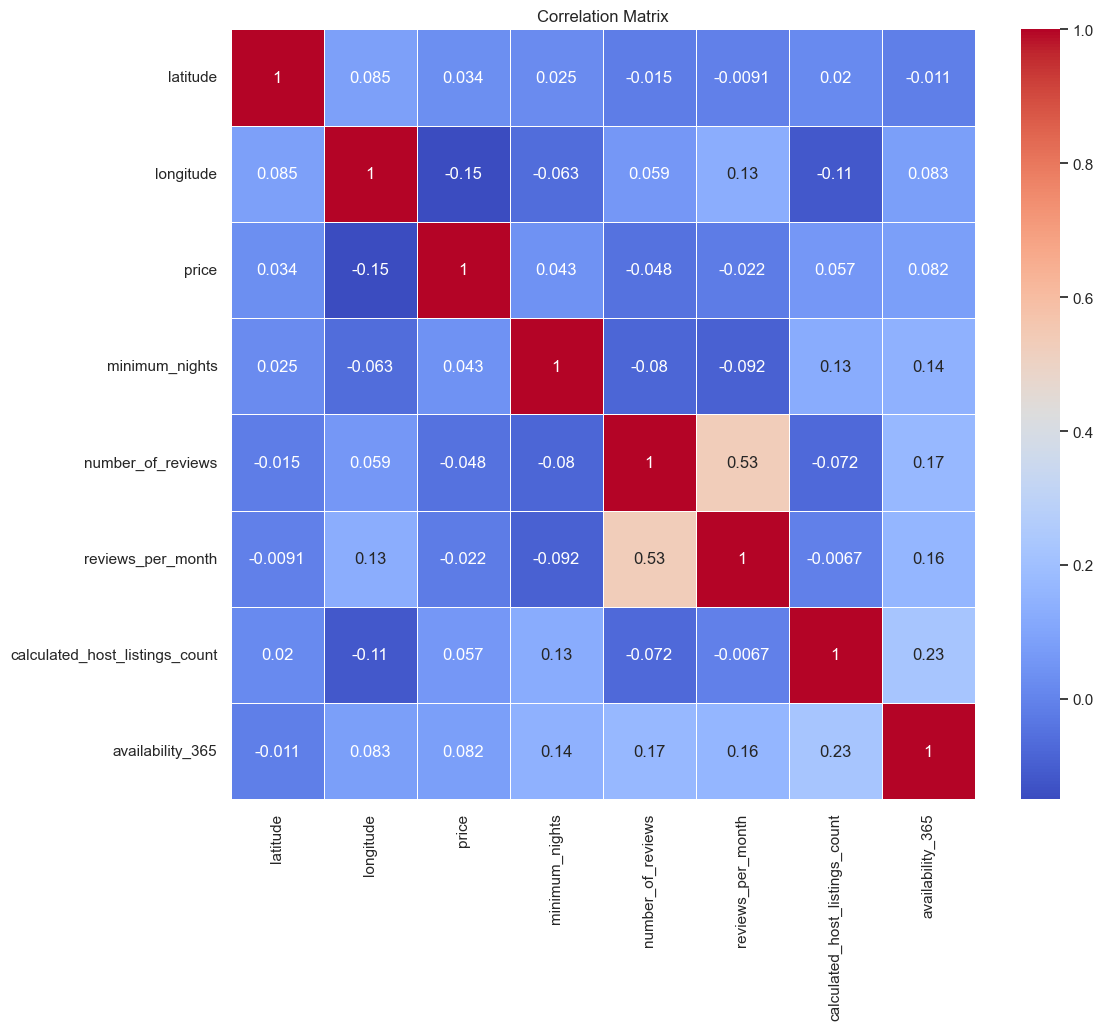

In [18]:
plt.figure(figsize=(12, 10))
corr_matrix = bnb_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

I created a scatter plot to visualize the geographic distribution of Airbnb listings across New York City, using latitude and longitude coordinates colored by neighbourhood group.

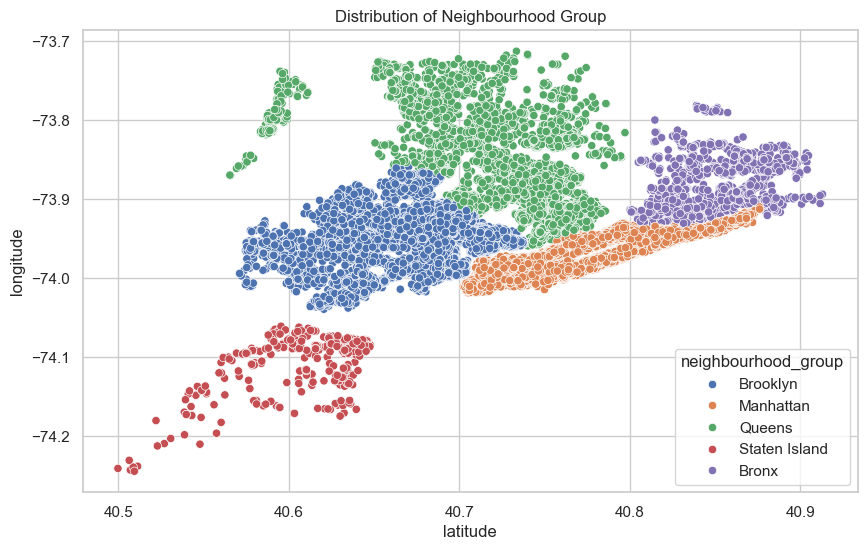

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')

plt.show()

You can notice clusters of points, with Manhattan appearing very dense, while Staten Island is more sparsely populated.

I created a scatter plot to visualize the geographic distribution of Airbnb listings across New York City, using latitude and longitude coordinates colored by room type.

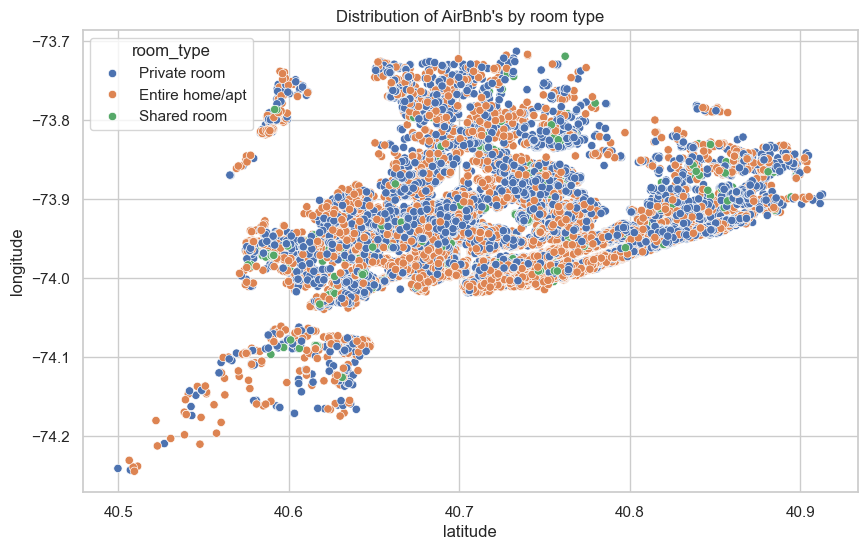

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'room_type')
plt.title("Distribution of AirBnb's by room type")

plt.show()

I plotted the distribution of Airbnb listing prices to understand how prices are spread across the dataset.

<Figure size 1000x1000 with 0 Axes>

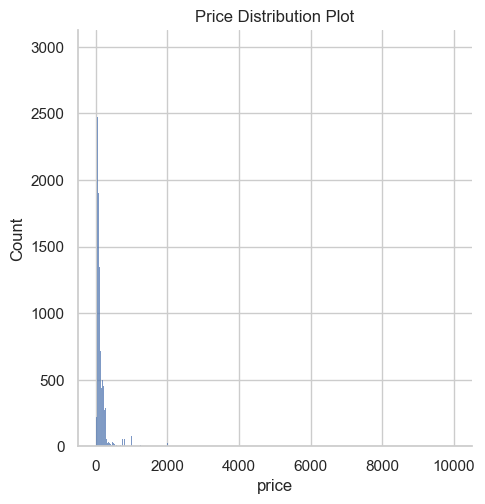

In [21]:
plt.figure(figsize=(10,10))
sns.displot(bnb_df['price'])
plt.title("Price Distribution Plot")
plt.show()

The distribution is highly right-skewed, with most listings priced at the lower end and a long tail of expensive properties.

<Figure size 1000x600 with 0 Axes>

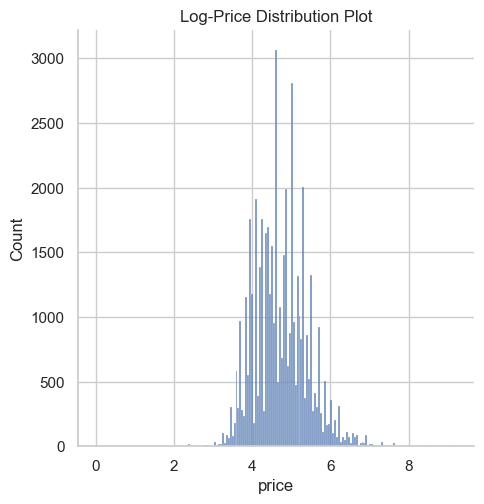

In [22]:
plt.figure(figsize=(10,6))
sns.displot(np.log1p(bnb_df['price']))
plt.title("Log-Price Distribution Plot")
plt.show()

After applying the log transformation, the price distribution becomes much more balanced and looks like a bell-shaped curve. This means that low and medium prices are spread out more evenly, and the few very high prices are no longer extreme outliers. Because of this, machine learning models can make better and more stable predictions.

**2.1 Outilier Distribution**

<Figure size 1000x600 with 0 Axes>

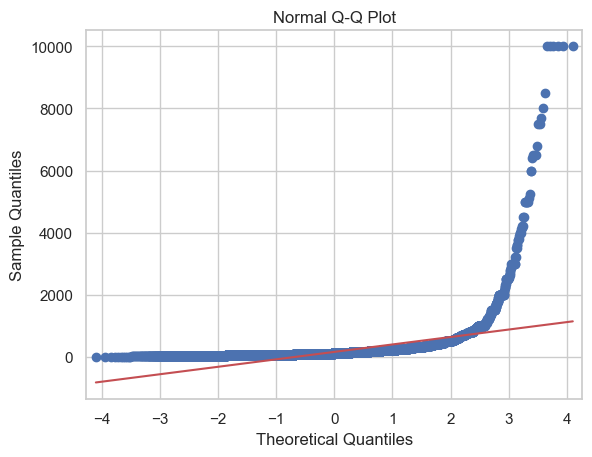

In [23]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(bnb_df['price'], line='s')
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

The plot shows significant deviation from the straight line (red), especially in the upper tail. The data points form a curve, indicating that the data does not follow a normal distribution. Moreover, the extreme deviation in the upper tail suggests that the data has heavy tails. This means there are more extreme values in the dataset than would be expected in a normal distribution. The sharp curve on the right side suggests that the data is positively skewed, as we have shown in the graph above.

After applying the log transformation, the Q-Q plot is much closer to the straight line, showing that the log-transformed prices follow a distribution closer to normal. This confirms that the transformation helps in reducing skewness and the impact of outliers, making the data more suitable for modeling.

<Figure size 1000x600 with 0 Axes>

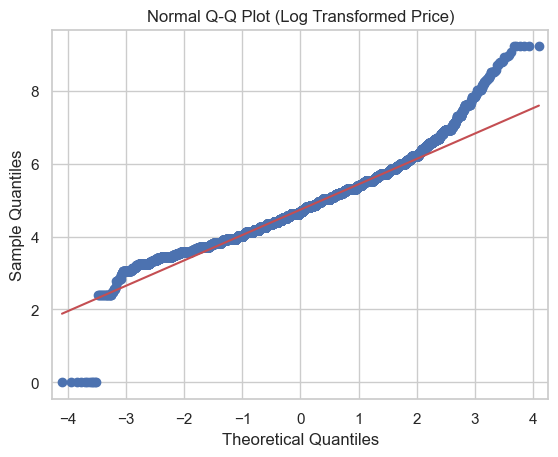

In [24]:
plt.figure(figsize=(10, 6))
sm.qqplot(np.log1p(bnb_df['price']), line='s')
plt.title('Normal Q-Q Plot (Log Transformed Price)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()